**Step 1:** Importing Packages

In [ ]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=9b25e81947038c21ead6bbdb8749f98fb091e7dd385ea7743e1954dd24253455
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import numpy as np
import pandas as pd
import requests
import pandas_ta as ta
import matplotlib as plt
import plotly.graph_objects as go


**Step 2:**
- Listing my API Key
- Constructing the URL's for 4 top gaming companies: Microsoft, Take Two Interactive, Ubisoft, Nintendo
- Turning this data into a data frame
- Combine all the data frames into one
- Finding average RSI for the past 7 days, and we are going to choose the two companies with the lowest average RSI as this may indicate a potential buy signal
- Based on the Results below, **NTDOY and UBSFY** have the lowest RSI meaning it could be a good time to buy. This creates motivation for us to see which of the two will have the highest predicted stock value in the upcoming days

In [ ]:
# Alpha Vantage API key
api_key = 'JCQFVNBK3U8QMZ0T'

# Construct the URL's for different gaming companies with the API key, this is for the RSI not for the actual stock prediction.
#After constructing a search engine query, some of the top gaming companies include: Take Two Interactive (TTWO), Ubisoft (UBSFY), Microsoft (MSFY), and Nintendo (NTDOY)
url_ttwo = f'https://www.alphavantage.co/query?function=RSI&symbol=TTWO&interval=weekly&time_period=10&series_type=open&apikey={api_key}&datatype=csv'
url_ntdoy = f'https://www.alphavantage.co/query?function=RSI&symbol=NTDOY&interval=weekly&time_period=10&series_type=open&apikey={api_key}&datatype=csv'
# Read data into a DataFrame
df_ttwo = pd.read_csv(url_ttwo)
df_ntdoy = pd.read_csv(url_ntdoy)

In [ ]:
df_ntdoy

In [ ]:
RSI = pd.concat([df_ttwo,df_ntdoy], axis=1) #combining all the data frames

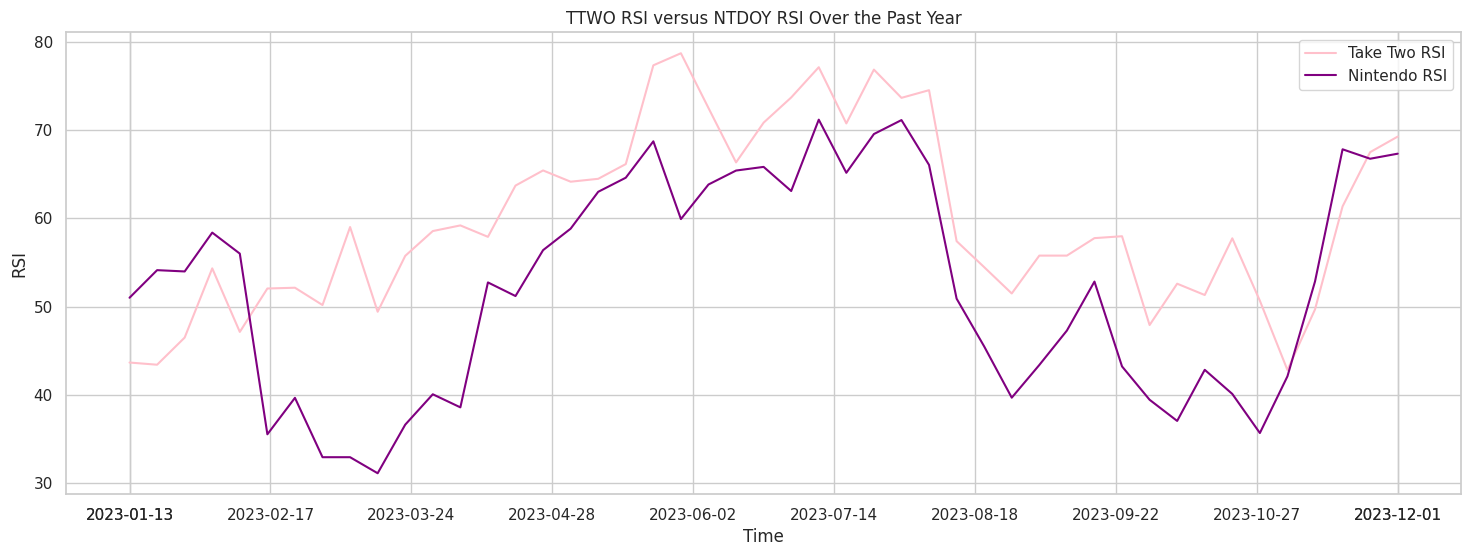

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'time' and 'RSI' are column names in your DataFrame
x_column = 'time'
y_column = 'RSI'

# Set the style of the visualization
sns.set(style="whitegrid")

# Select rows 36 to 47 in reverse order for both dataframes
df_ttwo_subset = df_ttwo.head(47).iloc[::-1]
df_ntdoy_subset = df_ntdoy.head(47).iloc[::-1]

# Set the figure size to make it wider
plt.figure(figsize=(18, 6))  # Adjust the width and height as needed

# Create a line plot with two lines using Seaborn for the subsets
sns.lineplot(x=x_column, y=y_column, data=df_ttwo_subset, label='Take Two RSI', color='pink')
sns.lineplot(x=x_column, y=y_column, data=df_ntdoy_subset, label='Nintendo RSI', color='purple')

# Get the x-axis ticks
x_ticks = plt.xticks()[0]

# Keep only the first and last tick, and generate 10 evenly spaced ticks in between
selected_ticks = [x_ticks[0]] + np.linspace(x_ticks[0], x_ticks[-1], 10).tolist() + [x_ticks[-1]]
plt.xticks(selected_ticks)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('RSI')
plt.title('TTWO RSI versus NTDOY RSI Over the Past Year')

# Show legend
plt.legend()

# Show the plot
plt.show()


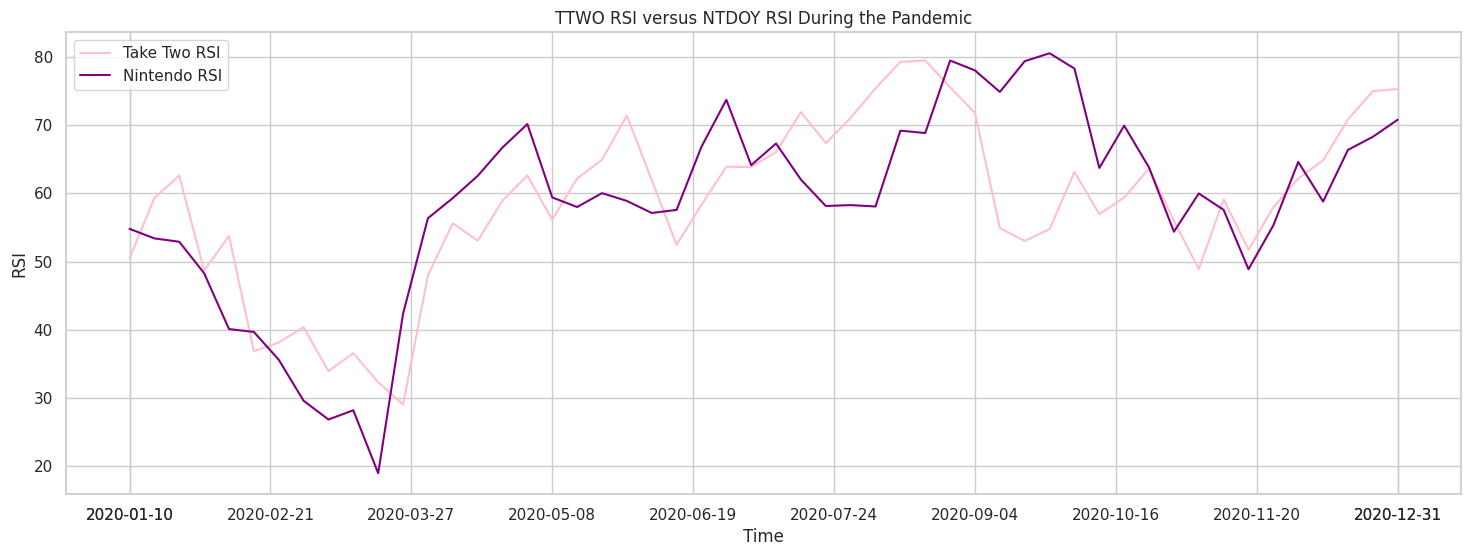

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'time' and 'RSI' are column names in your DataFrame
x_column = 'time'
y_column = 'RSI'

# Set the style of the visualization
sns.set(style="whitegrid")

# Select rows 36 to 47 in reverse order for both dataframes
df_ttwo_subset = df_ttwo.iloc[152:204][::-1]
df_ntdoy_subset = df_ntdoy.iloc[152:204][::-1]

# Set the figure size to make it wider
plt.figure(figsize=(18, 6))  # Adjust the width and height as needed

# Create a line plot with two lines using Seaborn for the subsets
sns.lineplot(x=x_column, y=y_column, data=df_ttwo_subset, label='Take Two RSI', color='pink')
sns.lineplot(x=x_column, y=y_column, data=df_ntdoy_subset, label='Nintendo RSI', color='purple')

# Get the x-axis ticks
x_ticks = plt.xticks()[0]

# Keep only the first and last tick, and generate 10 evenly spaced ticks in between
selected_ticks = [x_ticks[0]] + np.linspace(x_ticks[0], x_ticks[-1], 10).tolist() + [x_ticks[-1]]
plt.xticks(selected_ticks)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('RSI')
plt.title('TTWO RSI versus NTDOY RSI During the Pandemic')

# Show legend
plt.legend()

# Show the plot
plt.show()